## Projecto Taxis de Nueva York

### Entendiendo el escenario y el problema

El proyecto trata en primer lugar de analizar el dataset, realizar una limpieza de datos que no necesitemos, cambiar el formato del dato en las columnas en las que sea necesario y preparar el dataset para su posterior análisis y uso.

Una vez el análisis este completado se realizará un test de hipótesis del tipo A/B y se intentarán realizar dos modelos. Uno que prediga el precio que tendrá el viaje en taxi y el otro que se encargue de predecir si un cliente va a ser generoso con la propina o no.

In [1]:
# Importamos librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from scipy import stats

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,\
classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df0 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

El data set contiene las siguientes variables:

Column Name  |Description |
-----|:-----|
ID|Trip identification number|
VendorID|A code indicating the TPEP provider that provide the record.|
tpep_pickup_datetime|The date and time when the meter was engaged.|
tpep_dropoff_datetime|The date and time when the meter was disengaged.|
Passenger_count|The number of passenger in the vehicle (This is a driver-entered value)|
Trip_distance|The elapsed trip distance in miles reported by the taximeter (milles)|
PULocationID|TLC Taxi Zone in which the taximeter was engaged.|
DOLocationID|TLC Taxi Zone in which the taximeter was disengaged.|
RateCodeID|The final rate code in effect at the end of the trip.|
Store_and_fwd_flag|This flag indicates whether the trip record was held in vehicle memory before sent to the vendor because the vehicle did not have a connection to the server.|
Payment_type|A numeric code signifying how the passenger paid for the trip.|
Fare_amount|The time-and-distance fare calculated by the meter.|
Extra|Miscellaneous extras and surcharges. Currently this only include the $\$0.50$ and $\$1$ rush hour and overnight charges.|
MTA_tax|$\$0.50$ MTA tax that is automatically triggered based on the metered rate in use.| 
Improvement_surcharge|$\$0.30 $ improvement surcharge assessed trips and the flag drop. The improvement surcharge began being levied in 2015.|
Tip_amount|Tip amount - This field is automatically populated for credit card tips. Cash tips are not included.|
Tolls_amount|Total amount of all tolls paid in trips.|
Total_amount|The total amount charged to passengers. Does not include chas tips.|

In [4]:
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


### Información básica de los datos

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Podemos ver que los valores en las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` son objects. Más adelante tendremos que convertir el tipo de los datos para poder operar con ellos si queremos crear columnas nuevas en base a esas dos columnas.

In [6]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Comprobando si faltan valores y si hay filas duplicadas

In [7]:
#Comprobando valores omitidos
df0.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [8]:
#Comprobando valores duplicados
df0.duplicated().sum()

0

Hemos comprobado que no hay ni valores omitidos ni filas duplicadas. Esto nos facilita claramente la preparación de los datos y el análisis

### Convertir las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` a tipo datetime

Como he dicho anteriormente hay que cambiar las columnas `tpep_pickup_datetime` y `tpep_dropoff_datetime` a formato datetime. Esto lo hago principalmente porque voy a querer operar con ellas para crear una columna que me de la duración total del viaje. Si dejase las columnas como objetos no podría realizar esta operación.

In [9]:
#Comprobando el formato
df0['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [10]:
#Convertir a formato datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

In [11]:
#Comprobando el formato otra vez 
print('Data type of tpep_pickup_datetime:', df0['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df0['tpep_dropoff_datetime'].dtype)

Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


### Crear una columna de duración

In [12]:
#Creamos la nueva columna. Las unidades de la columna serán minutos.
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [13]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Valores atípicos

Teniendo en cuenta que muchas de las características no se utilizarán para ajustar el modelo, es probable que las columnas más importantes para comprobar los valores atípicos sean:
* `trip_distance`
* `fare_amount`
* `duration`


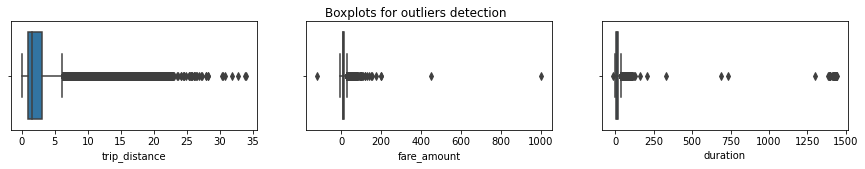

In [14]:
fig, axes = plt.subplots(1,3,figsize = (15,2))
plt.suptitle('Boxplots for outliers detection')
sns.boxplot(ax = axes[0], x = df0['trip_distance'])
sns.boxplot(ax = axes[1], x = df0['fare_amount'])
sns.boxplot(ax = axes[2], x = df0['duration']);

Podemos observar que las tres columnas contienen valores atípicos. Algunas son casos extremos mientras que otros no. En el caso de la distancia del viaje se puede llegar a aceptar que haya algún valor atípico excesivamente alto pues siempre puede haber un cliente que necesite realizar un viaje especialmente largo. En el caso de la columna `fare_amount` si que aparecen valores problemáticos. Hay tres valores que son claramente problemáticos, desde un valor negativo lo cual no se puede dar, hasta un valor que supera los 1000 dólares. Luego en cuanto a la columna `duration` los mayores valores podría entenderse como viajes muy largos pero claramente los viajes con tiempo menor de cero no tienen ningún sentido.

#### Valores atípicos `trip_distance`

In [15]:
df0['trip_distance'].describe()

count    22699.000000
mean         2.913313
std          3.653171
min          0.000000
25%          0.990000
50%          1.610000
75%          3.060000
max         33.960000
Name: trip_distance, dtype: float64

In [16]:
df0[df0['trip_distance'] > 30]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20,63.500000
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06,67.483333
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30,39.216667
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80,37.900000
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21,60.150000
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31,87.800000


Solo hay 7 viajes que tengan una distancia mayor a 30 millas. Esto es perfectamente plausible en el contexto del dataset por lo que no van a suponer un problema en el análisis.

In [17]:
#Viajes con la menor distancia
sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

Las distancias se capturan con un alto grado de precisión. Sin embargo, podría ser posible que los viajes tuvieran distancias de cero si un pasajero pidiera un taxi y luego cambiara de opinión. Además, ¿hay suficientes valores cero en los datos como para plantear un problema?

In [18]:
print(sum(df0['trip_distance'] == 0))
print('Percentage of trips with a duration of 0 miles:', round((148/22699)*100, 2),'%')

148
Percentage of trips with a duration of 0 miles: 0.65 %


El porcentaje es tan bajo que no va a afectar a ningún modelo o predicción que hagamos por lo que podemos dejar esas filas o borrarlas. En nuestro caso vamos a dejarlas.

#### Valores atípicos `fare_amount`

In [19]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Los valores negativos son claramente un problema. Si un valor es negativo en esta columna significaría que el taxista ha pagado al cliente. Lo que vamos a hacer para solucionar esto es cambiar el todos los valores negativos que aparezcan en esta columna por cero. De esta manera no eliminamos filas.

In [20]:
#Cambiar los valores menores de 0 a 0
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Ahora toca solucionar los valores excesivamente grandes. Está claro que el valor de 999 es un problema pues el percentil de 75% es de 14.5. Esto implica que hay una enorme distancia entre el final del rango intercuártilico y dicho valor. Para solucionarlo vamos a usar la siguiente función que he obtenido del curso de Google Advanced Data Analytics.

In [21]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

Esta función calcula el cuartil 0.25 y el cuartil 0.75, o lo que es lo mismo, el percentil 25% y el 75%. Luego calcula el rango intercuartílco y finalmente te da el umbral superior y sustituye los valores mayores a este por el valor de dicho umbral. 

In [22]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### Valores atípicos `duration` 

In [23]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

Aquí tenemos los mismos dos problemas que en el apartado anterior. La duración no puede ser menor que cero y el valor máximo es excesivamente alto por lo que vamos a tomar las mismas medidas que con la columna `fare_amount`.

In [24]:
df0.loc[df0['duration'] < 0, 'duration'] = 0
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



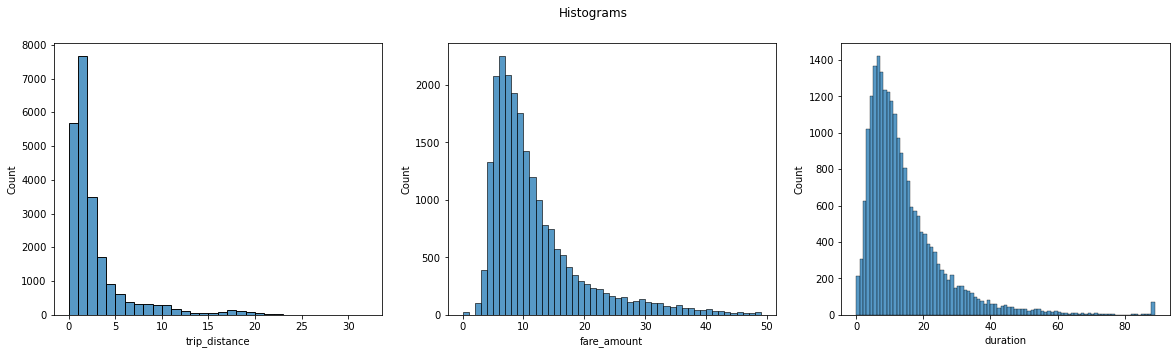

In [25]:
fig, axes = plt.subplots(1,3,figsize = (20,5))
plt.suptitle('Histograms')
sns.histplot(ax = axes[0], x = df0['trip_distance'], bins = range(0,33,1))
sns.histplot(ax = axes[1], x = df0['fare_amount'], bins = range(0, 50, 1))
sns.histplot(ax = axes[2], x = df0['duration'], bins = range(0,90,1));

### Estudio de las propinas dadas

Como uno de nuestro objetivos es crear un modelo que nos permita saber cuando un cliente va a dar buenas propinas y cuando no vamos a realizar un análisis de la columna `tip_amount`.

In [26]:
df0['tip_amount'].describe()

count    22699.000000
mean         1.835781
std          2.800626
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max        200.000000
Name: tip_amount, dtype: float64

In [27]:
sorted(set(df0['tip_amount']), reverse = True)[:10]

[200.0, 55.5, 51.64, 46.69, 42.29, 28.0, 25.2, 25.0, 22.22, 21.3]

Hay una gran diferencia entre el valor más grande en esta columna y el resto. Vamos a ver ese valor en mayor profundidad.

In [28]:
df0[df0['tip_amount'] == 200]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,62.5,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667


Esta fila tiene bastantes datos extraños. Es un viaje de 2.6 millas supuestamente. El viaje se realiza en 0.96 minutos lo cual es bastante extraño y el fare amount es 62.5 por lo que claramente ha sido uno de los valores atípicos que hemos modificado en esa columna. El `total_amount` es de 1200 dólares, un poco raro para un viaje de 2 millas que ha durado 0.96 minutos. Claramente esta fila tiene más datos erróneos que correctos por lo que lo más sensato sería eliminarla. 

In [29]:
#Eliminamos la fila
df0.drop(df0[(df0['tip_amount'] == 200)].index, inplace=True)

In [30]:
df0['tip_amount'].describe()

count    22698.000000
mean         1.827051
std          2.472576
min          0.000000
25%          0.000000
50%          1.350000
75%          2.450000
max         55.500000
Name: tip_amount, dtype: float64

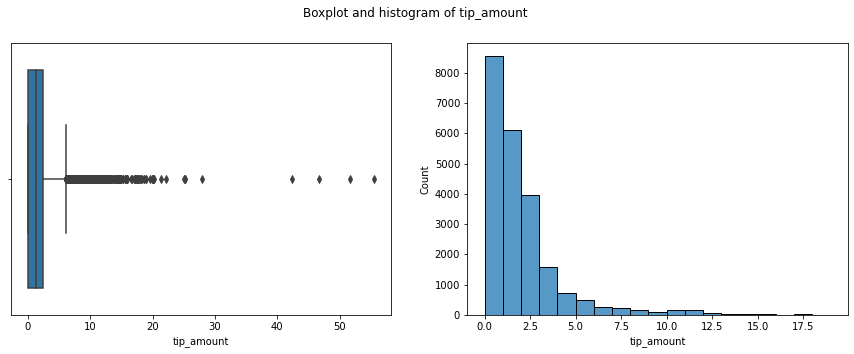

In [31]:
fig, axes = plt.subplots(1,2, figsize =(15,5))
plt.suptitle('Boxplot and histogram of tip_amount')
sns.boxplot(ax = axes[0], x = df0['tip_amount'])
sns.histplot(ax = axes[1], x = df0['tip_amount'], bins = range(0,20,1));

Se observa que claramente la mayoría de propinas se agrupan entre los 0 y los 3 doláres. En cuanto a los valores atípicos ya los hemos analizado concluyendo que esos valores de alrededor de 50 podrían llegar a ser plausibles.

#### Própinas por distribuidor

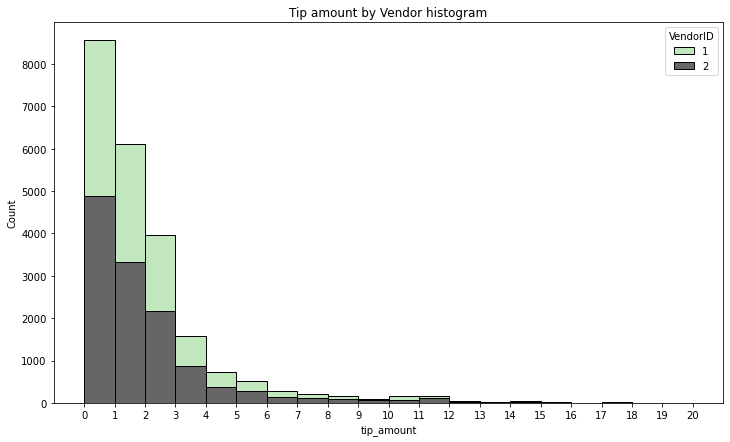

In [32]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(0,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor histogram');

Si se separa el importe de las propinas por vendedor, se observa que no hay aberraciones notables en la distribución de las propinas entre los dos vendedores del conjunto de datos. El vendedor dos se lleva una parte ligeramente superior de los viajes, y esta proporción se mantiene aproximadamente para todos los importes de propina.

A continuación, nos centramos en el extremo superior del intervalo de propinas para comprobar si el vendedor uno recibe una parte notablemente mayor de las propinas más generosas.

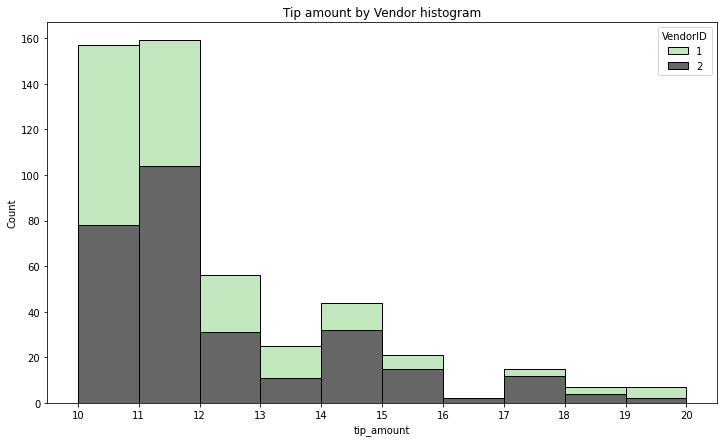

In [33]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data = df0, x = 'tip_amount',bins = range(10,21,1),
                  hue = 'VendorID',
                  multiple = 'stack',
                 palette = 'Greens_d')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by Vendor histogram');

Las proporciones se mantienen incluso en estas cantidades de propina más altas, con la excepción del extremo más alto, pero esto no es digno de mención debido al bajo tamaño de la muestra en estas cantidades de propina.

Ahora vamos a analizar si hay alguna relación entre el número de pasajeros y la propina que dan.

In [34]:
df0['passenger_count'].value_counts()

1    16116
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

Casi dos tercios de los viajes son para un único pasajero aunque hay 1100 viajes con 5 pasajeros y 700 con hasta 6 pasajeros. Aparecen 33 viajes con cero pasajeros, estos viajes se van a borrar a no ser que se encuentre una explicación razonable para este valor.

In [35]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


Podemos ver que el grupo que deja propinas más altas son los viajes con cero pasajeros. Viendo que hay tan solo 33 viajes con cero pasajeros y que no hay realmente una explicación para estos viajes sin pasajeros. Teniendo en cuenta que es la media más alta y que luego puede afectar al modelo que intentemos hacer para predecir las propinas que dará un cliente lo mejor sería eliminar estas 33 filas.

In [36]:
df0.drop(df0[(df0['passenger_count'] == 0)].index, inplace=True)

In [37]:
mean_tips_by_passenger_count = df0.groupby(['passenger_count'])[['tip_amount']].mean()
mean_tips_by_passenger_count

,tip_amount
passenger_count,
1,1.836625
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


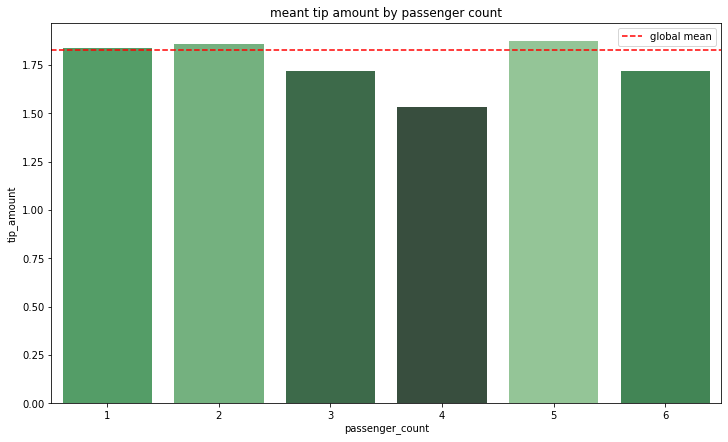

In [38]:
data = mean_tips_by_passenger_count
pal = sns.color_palette("Greens_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize =(12,7))
ax = sns.barplot(x = data.index, y = data['tip_amount'],
                palette = np.array(pal[::-1])[rank])
ax.axhline(df0['tip_amount'].mean(), ls = '--', color = 'red', label = 'global mean')
ax.legend()
plt.title('meant tip amount by passenger count');

 El importe medio de las propinas varía muy poco en función del número de pasajeros. Aunque disminuye notablemente en los viajes con cuatro pasajeros, era de esperar que hubiera un mayor grado de fluctuación, ya que los viajes con cuatro pasajeros eran los menos abundantes en el conjunto de datos (aparte de los viajes con cero pasajeros).

#### Viajes por mes

In [39]:
#Creamos una columna del mes
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
#Creamos una columna del día
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

In [40]:
#Número total de viajes por mes
monthly_rides = df0['month'].value_counts()
monthly_rides

March        2049
October      2022
April        2018
May          2013
January      1997
June         1964
December     1850
November     1833
February     1768
September    1730
August       1724
July         1697
Name: month, dtype: int64

In [41]:
#Ordenamos los meses
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July','August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index = month_order)
monthly_rides

January      1997
February     1768
March        2049
April        2018
May          2013
June         1964
July         1697
August       1724
September    1730
October      2022
November     1833
December     1850
Name: month, dtype: int64

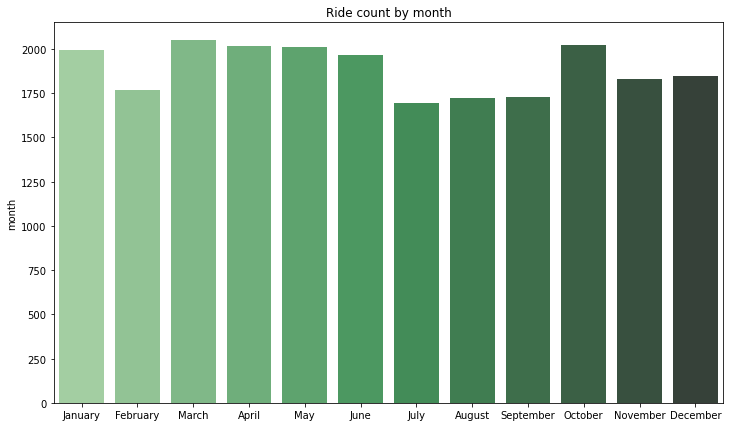

In [42]:
#Gráfico de barras para los viajes al mes
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(monthly_rides))
ax = sns.barplot(x = monthly_rides.index, y = monthly_rides, palette = pal)
ax.set_xticklabels(month_order)
plt.title('Ride count by month');

Los viajes mensuales son bastante constantes, con descensos notables en los meses de julio, agosto y septiembre, y también en febrero.

#### Viajes por día

In [43]:
#Mismo proceso pero esta vez para los días
daily_rides = df0['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index = day_order)
daily_rides

Monday       2925
Tuesday      3193
Wednesday    3385
Thursday     3399
Friday       3409
Saturday     3362
Sunday       2992
Name: day, dtype: int64

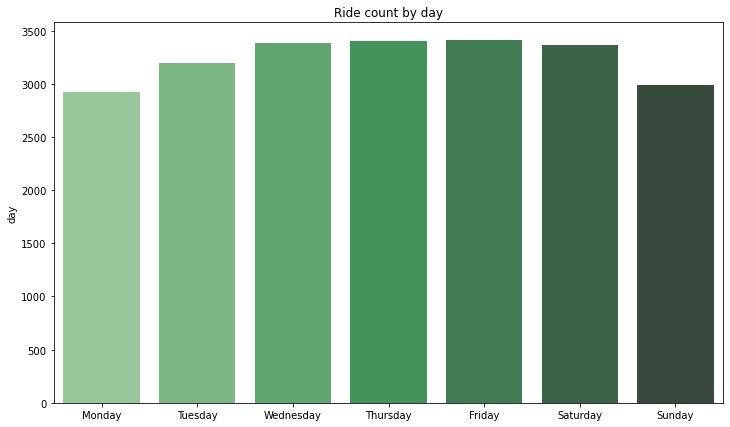

In [45]:
#Gráfico de barras para los viajes al día
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(daily_rides))
ax = sns.barplot(x = daily_rides.index, y = daily_rides, palette = pal)
ax.set_xticklabels(day_order)
plt.title('Ride count by day');

De miércoles a sábado se registró el mayor número de viajes diarios, mientras que el domingo y el lunes fueron los menos.

#### Ingresos totales al día

In [46]:
total_amount_day = df0.groupby('day')[['total_amount']].sum()
total_amount_day = total_amount_day.reindex(index = day_order)
total_amount_day

,total_amount
day,
Monday,48306.13
Tuesday,52353.17
Wednesday,55210.46
Thursday,57147.46
Friday,55757.89
Saturday,51118.65
Sunday,48556.44


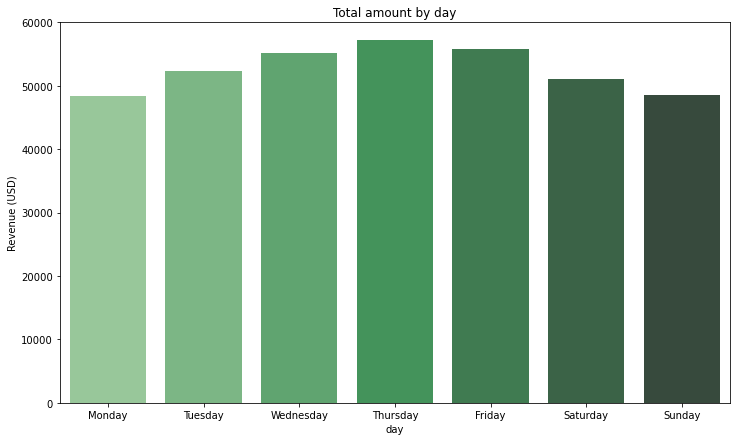

In [47]:
plt.figure(figsize = (12,7))
pal = sns.color_palette("Greens_d", len(total_amount_day))
ax = sns.barplot(x = total_amount_day.index, y = total_amount_day['total_amount'], palette = pal)
ax.set_xticklabels(day_order)
ax.set_ylabel('Revenue (USD)')
plt.title('Total amount by day');

El jueves es el día que más ingresos brutos hay mientras que el domingo y el lunes los que menos. Esto tiene sentido teniendo en cuenta los viajes realizados cada día. Lo que sí soprende es que la diferencia entre los ingresos el jueves y el sábado es de unos 6000 dólares habiendo únicamente 35 viajes menos. El descenso en ingresos entre el jueves y el sábado es del 10%, bastante elevado para haber únicamente una diferencia de 35 viajes.

#### Ingresos totales por mes

In [48]:
total_amount_month = df0.groupby('month')[['total_amount']].sum()
total_amount_month = total_amount_month.reindex(index = month_order)
total_amount_month


,total_amount
month,
January,31735.25
February,27737.60
March,33085.89
April,31934.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28164.78


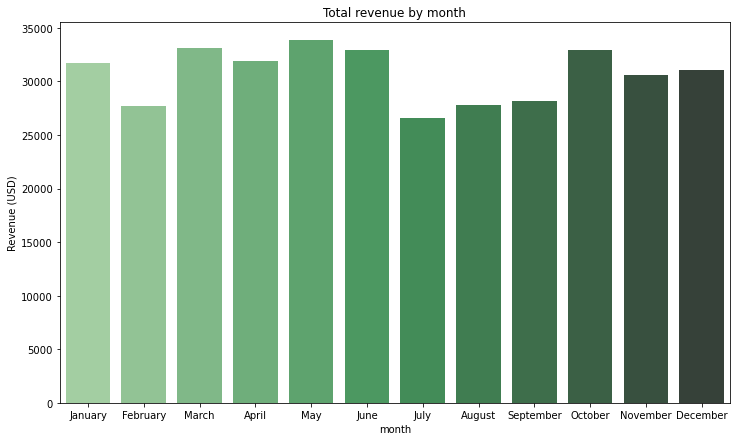

In [49]:
plt.figure(figsize = (12,7))
ax = sns.barplot(x = total_amount_month.index, y = total_amount_month['total_amount'], palette = 'Greens_d')
ax.set_ylabel('Revenue (USD)')
plt.title('Total revenue by month');

En general, los ingresos mensuales siguen la pauta de los viajes mensuales, con notables caídas en los meses de verano de julio, agosto y septiembre, y también una en febrero.

#### Construir la columna `mean_distance`

Cuando vayamos a desarrollar el modelo para predecir el coste del viaje en taxi no podremos usar la duración del viaje pues es un dato que no tendremos hasta finalizar el viaje. Sin embargo, podemos usar estadísticas de viajes que sí sabemos para generalizar sobre las que no sabemos.

Para hacer eso vamos a construir una columna que sea distancia media. Esta columna nos va a dar la distancia media para cada viaje dependiendo del punto de salida y de llegada. Estos datos sí los sabremos desde el principio del viaje. Para entenderlo mejor usaremos el siguiente ejemplo:

|Viaje|Comienzo|Final|Distancia|
|--: |:---:|:-:| ---:   |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

La columna `mean_distance` sería de la siguiente forma:

|Viaje|Comienzo|Final|Distancia|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Para hacer esto lo primero será crear una columna llamada `pickup_dropoff` donde juntemos los ID de los puntos de comienzo y final de trayecto.

In [50]:
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head(3)

0    100 231
1     186 43
2    262 236
Name: pickup_dropoff, dtype: object

In [51]:
grouped = df0.groupby('pickup_dropoff')[['trip_distance']].mean(numeric_only = True)
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


In [52]:
grouped_dict = grouped.to_dict()

grouped_dict = grouped_dict['trip_distance']

In [53]:
df0['mean_distance'] = df0['pickup_dropoff']

df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


Como podemos ver la columna nos da una distancia media dependiendo del ID. En la celda superior podemos ver que todos los viajes que han salido de '100' y han acabado en '231' tienen el mismo valor en la columna de `mean_distance`. Esta columna será muy útil a la hora de construir el modelo.

#### Construir la columna `mean_duration` 

Vamos a realizar lo mismo que con la columna anterior pero esta vez asociando a cada viaje una duración media dependiendo del punto de salida y el punto de llegada.

In [54]:
grouped = df0.groupby('pickup_dropoff')[['duration']].mean(numeric_only = True)
grouped

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']

df0['mean_duration'] = df0['pickup_dropoff']
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

df0[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Construir la columna `rush_hour`

La 'rush hour' se va a definir como:
- Cualquier día entre semana (no sábados y dómingos)
- Los intervalos de 6:00-10:00 y 16:00-20:00

Vamos a crear una columna binaria que nos indique si el viaje se ha realizado durante la 'rush_hour' o no.

In [55]:
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

df0.loc[df0['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0

In [56]:
def rush_horizer(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else: 
        val = 0
    return val

In [57]:
df0.loc[(df0.day != 'Saturday') & (df0.day != 'Sunday'), 'rush_hour'] = df0.apply(rush_horizer, axis = 1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,March,Saturday,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,April,Tuesday,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,December,Friday,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,May,Sunday,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,April,Saturday,4 112,4.435000,14.616667,0


In [58]:
df0['rush_hour'].value_counts()

0    15940
1     6725
Name: rush_hour, dtype: int64

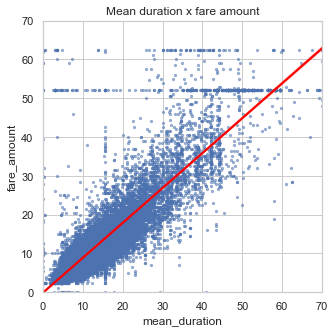

In [59]:
#Gráfico de la duración media frente a la cantidad 
sns.set(style = 'whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x = df0['mean_duration'], y = df0['fare_amount'],
            scatter_kws = {'alpha':0.5, 's':5},
            line_kws = {'color':'red'})
plt.ylim(0,70)
plt.xlim(0,70)
plt.title('Mean duration x fare amount');

La variable `mean_duration` tiene una clara correlación positiva con la varriable objetivo a predecir en el modelo, `fare_amount` en este caso. Pero aparece una pregunta, ¿qué son las líneas horizontales que aparecen en 52 y 63 dólares? 

Una de las filas sabemos su causa. Todos los valores en 62,50 dólares es debido a que se modificaron todos los datos que superaban el umbral superior. ¿Cuál es la otra línea?

In [60]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     82
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

In [61]:
df0[df0['fare_amount'] > 50].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,month,day,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,March,Sunday,236 132,19.211667,40.500000,0
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667,October,Wednesday,138 265,20.552000,39.376667,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,88.783333,November,Monday,132 23,30.830000,88.783333,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,June,Saturday,132 163,19.229000,52.941667,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,1,51.5,0.0,0.5,11.60,5.76,0.3,69.66,53.650000,December,Monday,138 88,15.393333,64.316667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,November,Saturday,132 132,2.255862,3.021839,0
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,62.5,0.0,0.5,0.00,0.00,0.3,72.30,88.783333,June,Thursday,230 219,16.900000,88.783333,0
176,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,2,62.5,0.5,0.0,0.00,10.50,0.3,80.80,37.833333,June,Tuesday,163 1,18.050000,37.833333,0
220,95620783,2,2017-11-11 13:39:55,2017-11-11 14:53:05,1,13.61,1,N,132,181,1,55.0,0.0,0.5,11.16,0.00,0.3,66.96,73.166667,November,Saturday,132 181,17.358571,42.697619,0
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.89,1,N,138,87,1,53.0,0.0,0.5,10.00,5.76,0.3,69.56,59.033333,August,Wednesday,138 87,13.812500,44.284722,1


Parece que casi todos los viajes de estas primeras 30 filas en los que el importe es de 52 dólares empiezan o terminan en la ubicación 132, todos ellos con un RatecodeID de 2. No hay ninguna razón aparente para que la úbicación 132 tenga tantos viajes con la misma tarfia. Parece que estos viajes ocurren todos los días, a horas diferentes, con ambos proveedores, en todos los meses. Sin embargo, hay muchos peajes de 5,76 y 5,54 dólares. Esto parece indicar que la ubicación 132 se encuentra en una zona que con frecuencia requiere peajes para ir y volver.

Comprobando el diccionario del dataset descubrimos que el RatecodeID de 2 indica el aeropuerto JFK. Una búsqueda rápida en google nos permite saber que en 2017, año del dataset, había una tarifa plana de 52 dólares para todos los viajes entre el aeropuerto y Manhattan.

Dado que hemos encontrado una explicación a los datos, estos datos obviamente deben de permanecer en el dataset.

#### Aislar las variables de modelización

In [62]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22665 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22665 non-null  int64         
 1   VendorID               22665 non-null  int64         
 2   tpep_pickup_datetime   22665 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22665 non-null  datetime64[ns]
 4   passenger_count        22665 non-null  int64         
 5   trip_distance          22665 non-null  float64       
 6   RatecodeID             22665 non-null  int64         
 7   store_and_fwd_flag     22665 non-null  object        
 8   PULocationID           22665 non-null  int64         
 9   DOLocationID           22665 non-null  int64         
 10  payment_type           22665 non-null  int64         
 11  fare_amount            22665 non-null  float64       
 12  extra                  22665 non-null  float64       
 13  m

Vamos a eliminar las variables que no consideremos necesarias o que sean redundantes antes de construir el modelo.

In [63]:
df1 = df0.copy()

df1 = df1.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22665 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22665 non-null  int64  
 1   passenger_count  22665 non-null  int64  
 2   fare_amount      22665 non-null  float64
 3   mean_distance    22665 non-null  float64
 4   mean_duration    22665 non-null  float64
 5   rush_hour        22665 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [217]:
df1.head(10)

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0
5,2,6,9.0,2.052258,11.855376,0
6,2,1,47.5,12.830000,59.633333,1
7,2,1,16.0,4.022500,26.437500,1
8,2,1,9.0,1.019259,7.873457,0
9,1,1,13.0,1.580000,10.541111,0


#### Pair plot

Graficamos un Pair Plot para visualizar las relaciones entre las variables `fare_amount`, `mean_distance`, `mean_duration`.

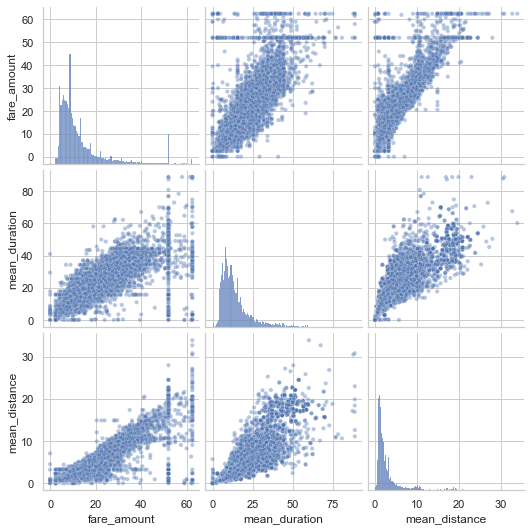

In [64]:
sns.pairplot(df1[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws = {'alpha':0.4, 'size':5});

Todas las variables parecen tener una correlación lineal con las otras dos variables.

#### Identificar correlaciones

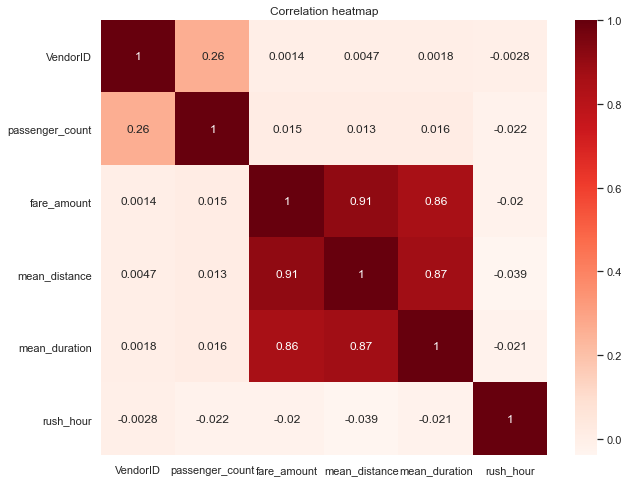

In [65]:
#Create a correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title('Correlation heatmap');

Tanto `mean_duration` como `mean_distance` están altamente correlacionadas con `fare_amount`, siendo esta la variable que queremos predecir. También están altamente correlacionadas entre ellas. Esto puede ser un problema pues las variables predictoras que están altamente correlacionadas entre ellas pueden ser perjudiciales para los modelos de regresión lineal cuando se desea poder realizar inferencias estadísticas sobre los datos a parti del modelo. Sin embargo, las variables predictoras correlacionadas pueden utiliarse para crear un modelo predictor preciso si es más importante la predicción en sí, como es el caso, que utilizar el modelo como herramienta para aprender sobre los datos.

Este modelo predecirá `fare_amount`, que se utilizará omo variable de predicción en los modelos de aprendizaje automático. Por lo tanto, se pueden usar ambas vaiables para construir el modelo. 

#### Dividir los datos en variables de predicción y resultado

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22665 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22665 non-null  int64  
 1   passenger_count  22665 non-null  int64  
 2   fare_amount      22665 non-null  float64
 3   mean_distance    22665 non-null  float64
 4   mean_duration    22665 non-null  float64
 5   rush_hour        22665 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


In [68]:
X = df1.drop(columns=['fare_amount'])

y = df1[['fare_amount']]

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


#### Preprocesamiento de los datos

In [69]:
X['VendorID'] = X['VendorID'].astype(str)

X = pd.get_dummies(X, drop_first= True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [70]:
#Crear training y test sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [71]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_Train_scaled', X_train_scaled)

X_Train_scaled [[-0.50024647 -0.54385868 -0.71738506 -0.64884754  0.89545986]
 [-0.50024647  0.13809851 -0.24180475  1.54119409 -1.11674464]
 [-0.50024647 -0.53585843 -0.43457719 -0.64884754  0.89545986]
 ...
 [-0.50024647 -0.43628922 -0.18913147 -0.64884754 -1.11674464]
 [-0.50024647 -0.56439095 -0.76753128 -0.64884754  0.89545986]
 [-0.50024647  0.13559882  0.44747556  1.54119409 -1.11674464]]


In [72]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [73]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.847399680109636
R^2: 0.847399680109636
MAE: 2.1709653256315193
MSE: 16.875182293846574
RMSE: 4.107941369329238


In [74]:
X_test_scaled = scaler.transform(X_test)

In [75]:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8467126425131878
R^2: 0.8467126425131878
MAE: 2.136294482868575
MSE: 17.25033314747087
RMSE: 4.153352037507881


El rendimiento del modelo es bueno tanto en los sets de entrenamiento como en los de testing, lo que sugiere que no hay sesgo en el modelo y que éste no presenta overfitting. Para los daots de testing el valor de $R^2 = 0.847$ significa que el 84.7% de la varianza en `fare_amount` estan descritos por el modelo.   

#### Resultados

In [77]:
#Crear un dataframe con los resultados
results = pd.DataFrame(data = {'actual':y_test['fare_amount'],
                               'predicted': y_pred_test.ravel(),})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
9825,10.5,11.903327,-1.403327
14103,9.5,8.154051,1.345949
3516,4.0,4.797943,-0.797943
16596,8.5,10.739782,-2.239782
21399,40.0,33.359174,6.640826


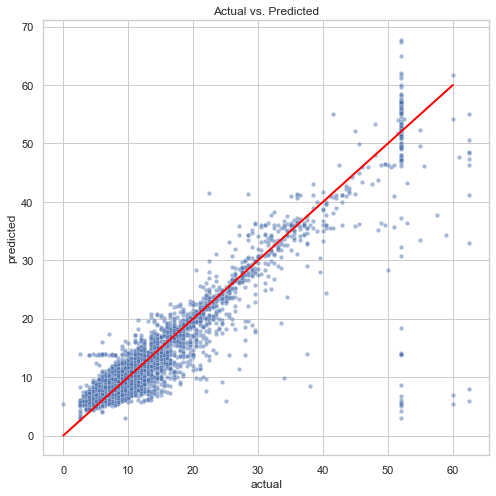

In [78]:
#Visualizamos lo predicho frente a los datos actuales
fig, ax = plt.subplots(figsize = (8,8))
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'actual',
                y = 'predicted',
                data = results,
                s = 20,
                alpha = 0.5,
                ax = ax)
plt.plot([0,60],[0,60], c = 'red', linewidth = 2)
plt.title('Actual vs. Predicted');

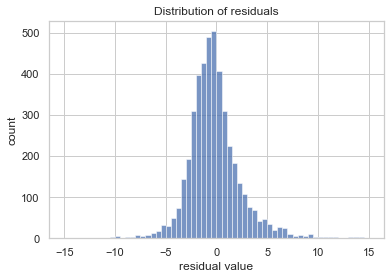

In [79]:
#Dsitribución de los residuos
sns.histplot(results['residual'], bins = np.arange(-15.0,15.5,0.5))
plt.title('Distribution of residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [80]:
results['residual'].mean()

0.030221354042436293

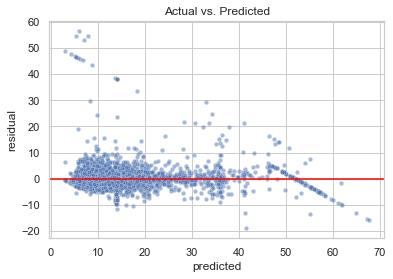

In [81]:
#Datos predichos frente a los residuos
sns.set(style = 'whitegrid')
sns.scatterplot(x = 'predicted',
                y = 'residual',
                data = results,
                s = 20,
                alpha = 0.5)
plt.axhline(0, c = 'red')
plt.title('Actual vs. Predicted');

En los tres gráficos anteriores hemos comprobado que se cumple tanto la linealidad, la distribución normal de residuos y la homocedasticidad. En la última característica hay unas líneas inclinadas que hacen referencia a los valores de 62,5 y 52 doláres.

In [82]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.018123,7.116245,2.829013,0.12079,-0.027526


Los coeficientes revelan que `mean_distance` es la variable con más peso a la hora de predecir `fare_amount`. Hay que tener cuidado a la hora de interpretar los datos. Se podría interpretar como que por cada milla recorrida el precio aumenta en 7,17 dólares pero esto no es cierto. La variable X ha sido estandarizada previamente por lo que las unidades ya no son millas. La interpretación correcta es: controlando las otras variables, por cada cambio de +1 en la desviación estandar, el impore de la tarifa aumenta una media de 7,13 dólares.

También hay que destacar que al no haber eliminado algunas variables bastantes correlacionadas, el intervalo de confianza de esta evaluación es más amplio.

### Test de hipótesis

Vamos a realizar un test de hipótesis acerca de los tipos de pago que nos va a servir para entender mejor cuando un cliente es generoso o no. Esto nos será muy útil cuando construyamos el siguiente modelo.

En el dataset, `payment_type` está codificado de la siguiente manera:
*   1: Credit card
*   2: Cash
*   3: No charge
*   4: Dispute
*   5: Unknown



In [83]:
df0.groupby('payment_type')[['fare_amount']].mean()

,fare_amount
payment_type,
1,13.272901
2,12.109145
3,12.343140
4,12.989130


$H_0$: No hay diferencia en el importe medio de las tarifas entre los clientes que utilizan tarjetas de crédito y los que utilizan efectivo.

$H_A$: Existe una diferencia en el importe medio de las tarifas entre los clientes que utilizan tarjetas de crédito y los que utilizan efectivo

Elegimos 5% como nivel de significación y se procede a un t-test de dos muestras.

In [84]:
credit_card = df0[df0['payment_type'] == 1]['fare_amount']
cash = df0[df0['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a = credit_card, b = cash, equal_var=False)

Ttest_indResult(statistic=7.92611592041291, pvalue=2.419651649979705e-15)

Como el p-value es menor del 5% concluimos que la hipótesis nula debe de ser rechaza y se puede afirmar que la gente que paga con tarjeta paga más que la gente que paga con efectivo.

1.   Puede ser que animar a los clientes a pagar con tarjeta de crédito puede generar más ingresos para los taxistas. 

2.   Este proyecto requiere suponer que se obligaba a los pasajeros a pagar de una forma u otra y que, una vez informados de este requisito, siempre lo cumplían. Los datos no se recogieron de esta manera, por lo que hubo que partir de la hipótesis de agrupar aleatoriamente las entradas de datos para realizar una prueba A/B. Este conjunto de datos no tiene en cuenta otras explicaciones probables. Por ejemplo, es posible que los usuarios no lleven mucho dinero en efectivo, por lo que es más fácil pagar los viajes más largos o lejanos con tarjeta de crédito. En otras palabras, es mucho más probable que el importe del billete determine el tipo de pago, y no al revés. 